# Logistic regression : boolean operators
2017010055 박현일

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (5,5)

In [28]:
class logistic_regression_model():
    def __init__(self, Y):
        self.w = np.array([random.random(), random.random()])
        self.b = np.array(random.random())
        self.X = np.array([(0,0), (0,1), (1,0), (1,1)])
        self.Y = Y
        self.costArray = []
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def predict(self, x):
        #z = self.w[0] * x[0] + self.w[1] * x[1] + self.b
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a
    
    def train(self, lr = 0.1):
        #dw0 = 0.0
        #dw1 = 0.0
        dw = np.array([0.0, 0.0])
        db = np.array(0.0)
        m = len(self.X)
        cost = 0.0

        for x, y in zip(self.X, self.Y):
            a = self.predict(x)
            if y == 1:
                cost -= np.log(a)
            else:
                cost -= np.log(1-a)

            #dw0 += (a-y)*x[0]
            #dw1 += (a-y)*x[1]
            dw += (a-y)*x
            db += (a-y)

        cost /= m
        #model.w[0] -= lr * dw0/m
        #model.w[1] -= lr * dw1/m
        self.w -= lr * dw/m
        self.b -= lr * db/m
        self.costArray.append(cost)

        return cost

In [29]:
AND_model = logistic_regression_model([0, 0, 0, 1])
OR_model = logistic_regression_model([0, 1, 1, 1])
XOR_model = logistic_regression_model([0, 1, 1, 0])

for epoch in range(10000):
    AND_model.train(3)
    OR_model.train(3)
    XOR_model.train(3)

(0.0, 1.0)

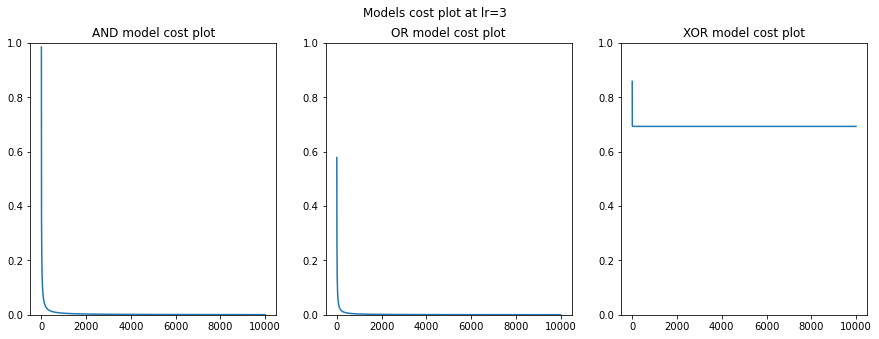

In [30]:
fig, line = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("Models cost plot at lr=3")

sns.lineplot(ax=line[0], data=AND_model.costArray)
line[0].set_title("AND model cost plot")
line[0].set_ylim(bottom=0, top=1)

sns.lineplot(ax=line[1], data=OR_model.costArray)
line[1].set_title("OR model cost plot")
line[1].set_ylim(bottom=0, top=1)

sns.lineplot(ax=line[2], data=XOR_model.costArray)
line[2].set_title("XOR model cost plot")
line[2].set_ylim(bottom=0, top=1)

In [31]:
print("   X\t      AND_model\t               OR_model\t      XOR_model")
for i in [(0,0), (0,1), (1,0), (1,1)]:
    print(f"{i} : {AND_model.predict(i)},\t {OR_model.predict(i)},\t {XOR_model.predict(i)}")

   X	      AND_model	               OR_model	      XOR_model
(0, 0) : 4.1912614107056677e-10,	 0.0006681037429268422,	 0.5
(0, 1) : 0.0006684597447590221,	 0.999732770454956,	 0.5
(1, 0) : 0.0006684597447590067,	 0.999732770439083,	 0.5
(1, 1) : 0.9990641488136947,	 0.9999999999522322,	 0.5
